# State Spaces

State spaces are useful for analyzing time series data that comes from dynamical systems.  We will discuss a few examples here.

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["text.usetex"] = True

## Mass on Spring

A damped mass on spring is a classic dynamical system.

The equation of motion for a damped mass on a spring is given as

$$
m \ddot{x} + c \dot{x} + k x = 0.
$$

Here $c$ is a damping coefficient (e.g., due to friction), $m$ is the mass, $k$ is the spring constant (due to Hook's law). We assume SI units. This system can be easily simulated by converting to first order equations and then integrating with `odeint`.

The first order equations are given as

$$
\begin{align*}
\dot{x} &= v \\
\dot{v} &= \frac{-k}{m}
\end{align*}
$$

Below we will show both time series and state space visualizations about this system. We will see how these can give us insights into the system's behavior.

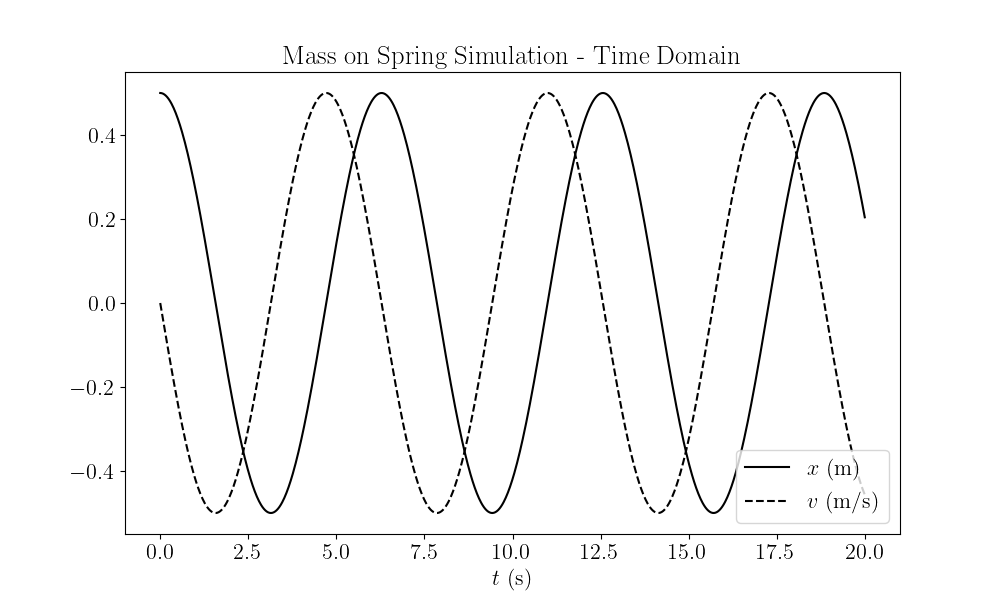

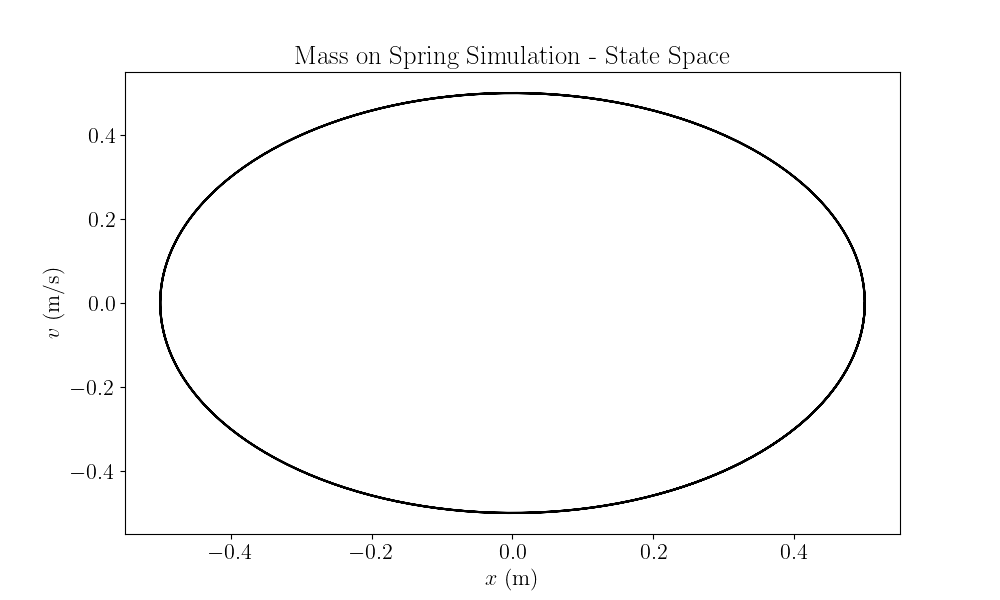

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Function that returns dx/dt and dv/dt with damping
def mass_spring_damped(
    y_state,
    t_seconds,
    k_spring_constant_newtons_per_meter,
    mass_kg,
    c_damping_coefficient,
):
    x_position, v_velocity = y_state
    dx_dt = v_velocity
    dv_dt = (
        -(c_damping_coefficient / mass_kg) * v_velocity
        - (k_spring_constant_newtons_per_meter / mass_kg) * x_position
    )
    return [dx_dt, dv_dt]


# System Parameters
mass_kg = 1.0
k_spring_constant_newtons_per_meter = 1.0
c_damping_coefficient = 0

# Initial conditions
x0_meters = 0.5
v0_mps = 0.0
y0 = [x0_meters, v0_mps]

# Time points
t_seconds = np.linspace(0, 20, 1000)

# Solve the ODE with damping
solution = odeint(
    mass_spring_damped,
    y0,
    t_seconds,
    args=(k_spring_constant_newtons_per_meter, mass_kg, c_damping_coefficient),
)

x_meters = solution[:, 0]
v_mps = solution[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(
    t_seconds, x_meters, label=r"$x\ \mathrm{(m)}$", color="k", linestyle="-"
)
plt.plot(
    t_seconds, v_mps, label=r"$v\ \mathrm{(m/s)}$", color="k", linestyle="--"
)
plt.xlabel(r"$t\ \mathrm{(s)}$")
plt.title("Mass on Spring Simulation - Time Domain")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_meters, v_mps, color="k")
plt.xlabel(r"$x\ \mathrm{(m)}$")
plt.ylabel(r"$v\ \mathrm{(m/s)}$")
plt.title("Mass on Spring Simulation - State Space")
plt.show()